In [ ]:
# To fill by the user

# key: franchise
# value: prime (par mois)
# Remplir les acollades avec pour chaque ligne, à gauche la franchise et à droite la prime
assurance_de_base = {
    300: 432.05,
    500: 421.25,
    1000: 394.05,
    1500: 366.95,
    2000: 339.85,
    2500: 312.65,
}

# key: libellé de la complémentaire
# val: prix par mois de la complémentaire
# Remplir les acollades avec pour chaque ligne, à gauche le nom de la complémentaire
# et à droite, le prix par mois de la complémentaire
complementaires = {
    'dentaire': 22.80,
}

# True pour calculer avec les complémentaires, False sinon
with_complementaires = True

# Comparaison des primes d'assurances

## Assura

### Assurance de base

a. franchise à 300.- : 432.05/mois

b. franchise à 500.- : 421.25/mois

c. franchise à 1000.- : 394.05/mois

d. franchise à 1500.- : 366.95/mois

e. franchise à 2000.- : 339.85/mois

f. franchise à 2500.- : 312.65/mois

In [83]:
from functools import reduce
import string
import pandas as pd
import matplotlib.pyplot as plt

def price_at_month(month_no, franchise, price_per_month):
    return franchise + price_per_month*month_no

def get_assura_according_to_estimated_expenses(expenses):
    obj = { 'months': range(0, 13) }
    for [i, [franchise, prime]] in enumerate(assurance_de_base.items()):
        if with_complementaires: prime = reduce(
            lambda prev_val, current : prev_val + current, complementaires.values(),
            prime
        )
        obj[alphabet[i]]= [
            price_at_month(month, expenses if expenses <= franchise else franchise, prime)
            for month in obj['months']
        ]
    return obj

def configure_plot(plt):
    # fig = plt.figure()
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.ylim(ymin=0); plt.xlim(xmin=0)
    plt.rcParams["figure.figsize"] = [10, 5]

def min_option(obj, amount):
    min = ('z', 99999, 99999)
    for k, v in obj.items():
        if k != 'months':
            if v[-1] < min[1]: min = (k, v[-1], amount)
    return min

def max_option(obj, amount):
    max = ('z', -99999, -99999)
    for k, v in obj.items():
        if k != 'months':
            if v[-1] > max[1]: max = (k, v[-1], amount)
    return max

# Config --------------------------------------------------------

alphabet = list(string.ascii_lowercase)
begin = 0
offset = 250
number_of_scenarios = 11
scenarios = [offset*i for i in range(begin, number_of_scenarios)]

Scénarios

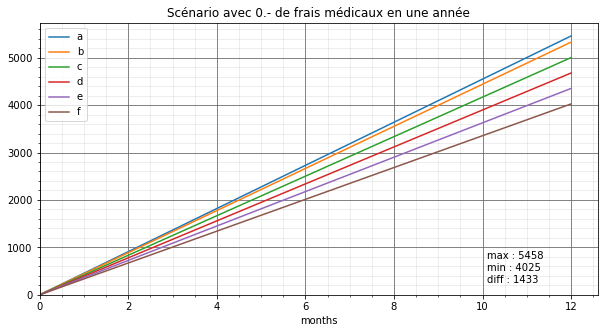

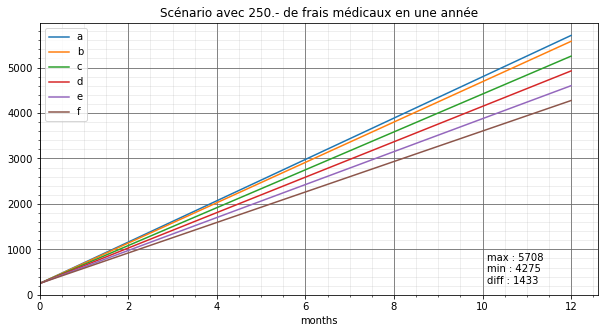

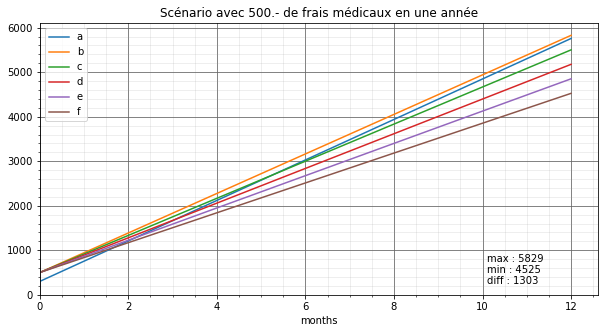

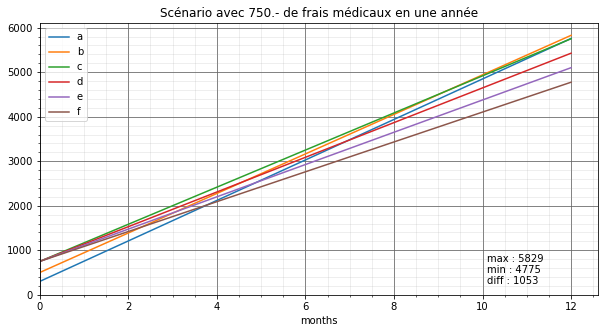

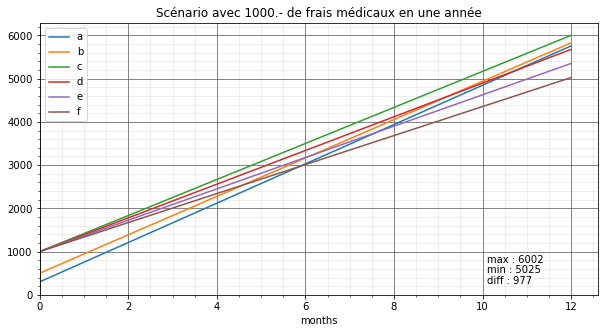

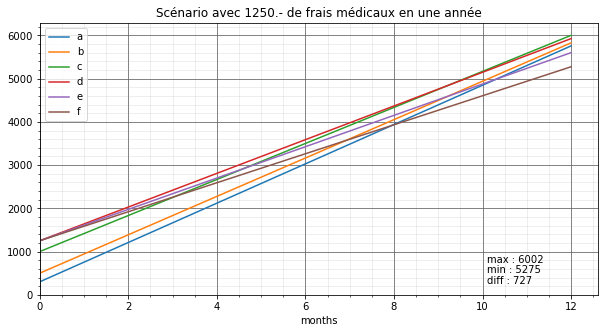

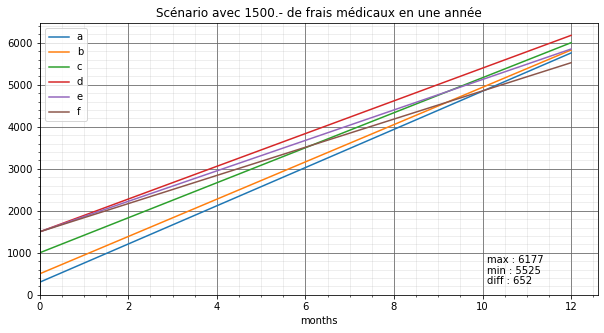

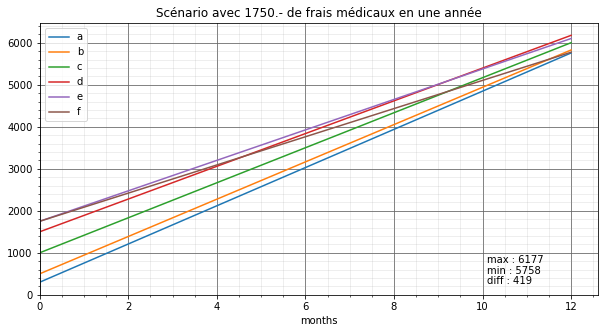

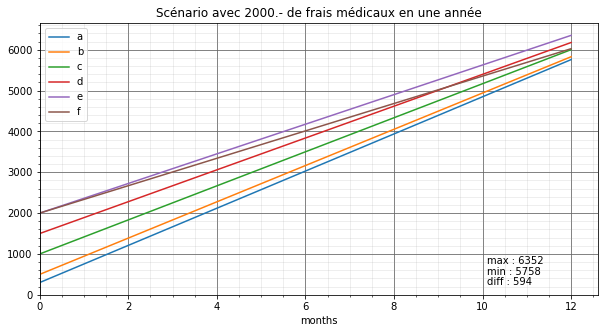

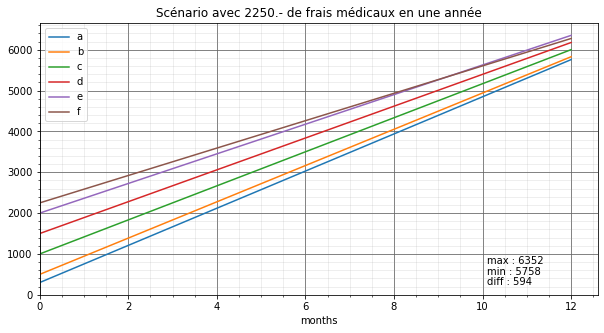

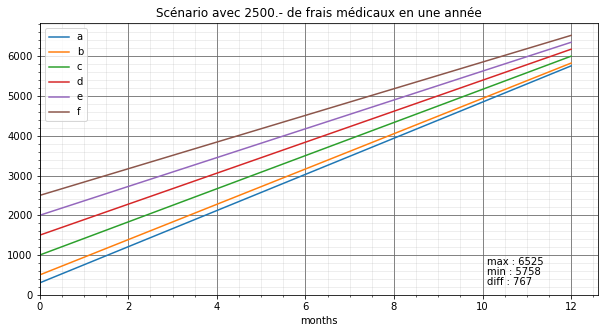

In [84]:
minimums = []

for estimated_expense in scenarios:
    assura = get_assura_according_to_estimated_expenses(estimated_expense)
    minimums.append(min_option(assura, estimated_expense))
    assura_df = pd.DataFrame(assura)
    ax = plt.gca()
    for key, values in assura.items():
        if key != 'months':
            assura_df.plot(kind='line', x='months', y=key, ax=ax)
    configure_plot(plt)
    plt.title('Scénario avec ' + str(estimated_expense) + '.- de frais médicaux en une année')
    min = min_option(assura, estimated_expense)[1]; max = max_option(assura, estimated_expense)[1]
    plt.text(10.1, 500, 'min : ' + str(round(min)))
    plt.text(10.1, 750, 'max : ' + str(round(max)))
    plt.text(10.1, 250, 'diff : ' + str(round(max-min)))
    plt.show()